# Credit Scoring Catatan

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df = pd.read_csv('D:\MLZoomcamp\module-6\CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [184]:
df.columns= df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


## changes the categorial value 

diubah karena isinya nomer 1,2,3 menjadi kata-kata agar bisa dipahami

In [185]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [186]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)

In [187]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [188]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [189]:
#to see missing values because the one who made this dataset change it to 999999

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [190]:
#replace 99999999.0 to np.NaN

for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [191]:

df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [192]:
#remove unk values in status variable because it only 1

df = df[df.status != 'unk'].reset_index(drop=True)
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

## Split dataset

In [193]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [194]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [195]:
#change the status variable into binary

y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [196]:
del df_train['status']
del df_val['status']
del df_test['status']

In [197]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## Decision Trees

In [198]:
#simple example of decision tree
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets']>6000:
            return 'ok'
        else:
            return 'default'
   

In [199]:
xi = df_train.iloc[0].to_dict()
assess_risk(xi), xi

('ok',
 {'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400})

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [201]:
#train 
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [202]:
dt = DecisionTreeClassifier(max_depth=3) 
#to control the depth of tree
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [203]:
#validation
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [204]:
#evaluation data
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val: ', auc)

train:  0.7761016984958594
val:  0.7389079944782155


In [205]:
#to look at the inside of the tree
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



## Decision Tree Learning Algorithm

In [206]:
#contoh dengan 2 feature

data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


to find the best thresholds

In [207]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [208]:
from IPython.display import display

In [209]:
#potential thresholds
Ts = [0, 2000, 3000, 4000, 5000, 8000]

#split data to left and right based on that potential thresholds
for T in Ts:
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    #use normalize = True so that we can see the ratio of it
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print(T)

,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
0


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
2000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
3000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
4000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
5000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64
8000


In [210]:
#contoh dengan 3 feature

data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [211]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [212]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [213]:
for feature, Ts in thresholds.items():
    print('######################')
    print(feature)
#split data to left and right based on that potential thresholds
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        #use normalize = True so that we can see the ratio of it
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print()
    print('######################')

######################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

######################
######################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

######################


## Decision Trees parameter tuning

In [214]:
#to try find the best max_dept
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.750
  10 -> 0.689
  15 -> 0.649
  20 -> 0.654
None -> 0.656


In [215]:

#we will test again in find the best leaf

scores = []
for d in [4, 5, 6, 7, 10, 15, 20, None]: #is list of how depth
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]: #is list of how many leaf
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

In [216]:
#create dataframe
columns = ['max_depth', 'min_sample_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_sample_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726


In [217]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_sample_leaf,auc
40,10.0,15,0.790905
67,NaN,15,0.787508
58,20.0,15,0.787348
41,10.0,20,0.786001
49,15.0,15,0.785692


In [218]:
#making pivot table
df_scores_pivot = df_scores.pivot(index='min_sample_leaf', 
                            columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth          NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_sample_leaf                                                        
1                0.663  0.761  0.766  0.750  0.733  0.701  0.658  0.655
2                0.688  0.761  0.766  0.757  0.759  0.700  0.687  0.697
5                0.710  0.761  0.768  0.763  0.757  0.731  0.717  0.716
10               0.761  0.761  0.762  0.778  0.764  0.768  0.759  0.762
15               0.788  0.764  0.772  0.785  0.780  0.791  0.786  0.787
20               0.784  0.761  0.774  0.774  0.780  0.786  0.782  0.784
100              0.779  0.756  0.763  0.776  0.780  0.779  0.779  0.779
200              0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500              0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_sample_leaf'>

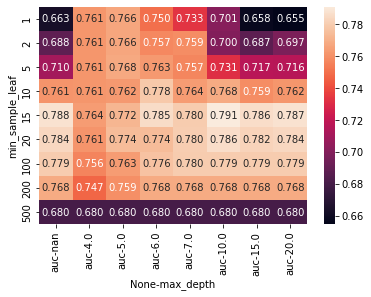

In [219]:
#visualize 
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [220]:
#so we choose depth = 6 and leaf = 15
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## Ensembles and Random Forest

In [221]:
from sklearn.ensemble import RandomForestClassifier

In [222]:
rf = RandomForestClassifier(n_estimators=10, random_state=1) 
#estimators it's number of models we want
#random_state for no matter how many we try it will be results the same
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [223]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [224]:
#result of the first decision tree
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [225]:
#experiment to see if the results changes as we increase
#the number of trees
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1) 
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))


In [226]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


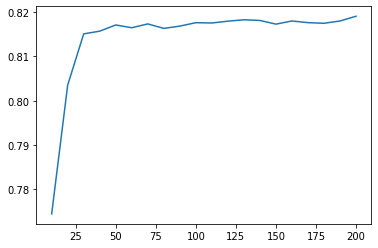

In [227]:
plt.plot(df_scores.n_estimators, df_scores.auc)

train random forest model for different depth parameter

In [228]:
scores = []
for d in[5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1) 
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))


In [229]:
columns=['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


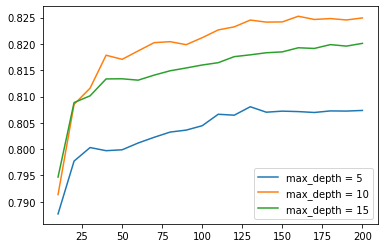

In [230]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label ='max_depth = %d' %d)
    
plt.legend()

In [231]:
#so the best one is 10
max_depth = 10

Check the best leaf

In [232]:
scores = []
for s in[1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1) 
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))


In [233]:
columns=['min_sample_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_sample_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


In [234]:
#zip two list
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_sample_leaf_value = [1, 3, 5, 10, 50]
min_leaf_color = list(zip(min_sample_leaf_value, colors))
min_leaf_color

#we do zip it so that later when iterate 1 is black, 3 is blue, etc

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

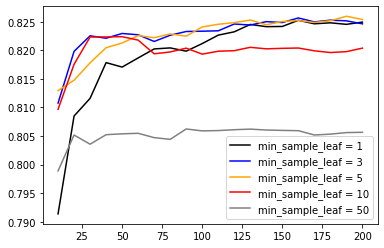

In [235]:

for s, col in min_leaf_color:
    df_subset = df_scores[df_scores.min_sample_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label ='min_sample_leaf = %d' %s)
    
plt.legend()

In [236]:
#let's go with min_sample_leaf = 3
min_sample_leaf = 3

In [237]:
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=d,
                            min_samples_leaf= min_sample_leaf,
                            random_state=1,
                            n_jobs = -1) 
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)

## Gradient Boosting and XGBoost

In [238]:
import xgboost as xgb

In [239]:
features =list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names=features)

In [240]:
#train model
xgb_params = {
    'eta': 0.3, #same with learning_rate
    'max_depth': 6,
    'min_child_weight': 1, #same with min_sample_leaf
    'objective': 'binary:logistic', 

    #so, xgb can do for binary, regression and classification
    # that's why need to choose in 'objective' and the logistic 
    # something similar to logistic regression

    'nthread': 8, #for prallelize training
    'seed': 1, 
    'verbosity': 1, 

    # verbosity is for controls what kind of warning we have 
    # when we training our model or do we want to see warnings when training or not
    #  1 means show only warnings

}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)
#num_boost_round is same with how much decision tree

In [241]:
#test model
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8072491584122448

In [242]:
#lets see if we train use 10 trees
#train model
xgb_params = {
    'eta': 0.3, #same with learning_rate
    'max_depth': 6,
    'min_child_weight': 1, #same with min_sample_leaf
    'objective': 'binary:logistic', 
    'nthread': 8, #for prallelize training
    'seed': 1, 
    'verbosity': 1, 

}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [243]:
#test model
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [244]:
# to see what happening inside
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [245]:
scores = {}

In [246]:
%%capture output 
#capture everything that this code outputs to a string

#lets see if we train use 10 trees
#train model
xgb_params = {
    'eta': 0.01, #same with learning_rate
    'max_depth': 6,
    'min_child_weight': 1, #same with min_sample_leaf
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    'nthread': 8, #for prallelize training
    'seed': 1, 
    'verbosity': 1, 

}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval = 5, #to print auc every 5 steps
                  evals=watchlist)

In [247]:
#to see the capture
print(output.stdout)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.87157	val-auc:0.77925
[10]	train-auc:0.87247	val-auc:0.78051
[15]	train-auc:0.87541	val-auc:0.78302
[20]	train-auc:0.87584	val-auc:0.78707
[25]	train-auc:0.88406	val-auc:0.79331
[30]	train-auc:0.89027	val-auc:0.79763
[35]	train-auc:0.89559	val-auc:0.79914
[40]	train-auc:0.89782	val-auc:0.79883
[45]	train-auc:0.89983	val-auc:0.79845
[50]	train-auc:0.90182	val-auc:0.79697
[55]	train-auc:0.90394	val-auc:0.79775
[60]	train-auc:0.90531	val-auc:0.79684
[65]	train-auc:0.90630	val-auc:0.79616
[70]	train-auc:0.90796	val-auc:0.79672
[75]	train-auc:0.90955	val-auc:0.79807
[80]	train-auc:0.91116	val-auc:0.79976
[85]	train-auc:0.91227	val-auc:0.80130
[90]	train-auc:0.91368	val-auc:0.80285
[95]	train-auc:0.91515	val-auc:0.80390
[100]	train-auc:0.91654	val-auc:0.80499
[105]	train-auc:0.91791	val-auc:0.80534
[110]	train-auc:0.91902	val-auc:0.80523
[115]	train-auc:0.92032	val-auc:0.80515
[120]	train-auc:0.92135	val-auc:0.80497
[125]	train-auc:0.9226

In [248]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

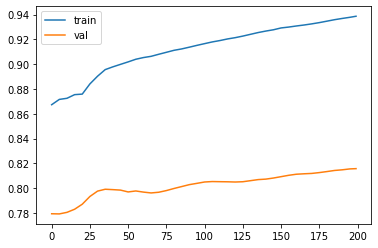

In [249]:
df_score = parse_xgb_output(output)
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label = 'val')
plt.legend()

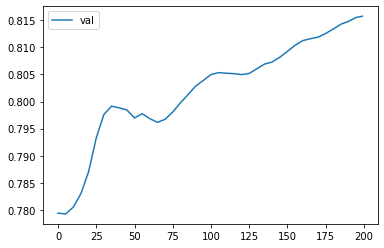

In [250]:
#only validation
plt.plot(df_score.num_iter, df_score.val_auc, label = 'val')
plt.legend()

## XGBoost Parameter Tuning

In [251]:
#experiment with different eta
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [252]:
scores.keys()

dict_keys(['eta=0.01'])

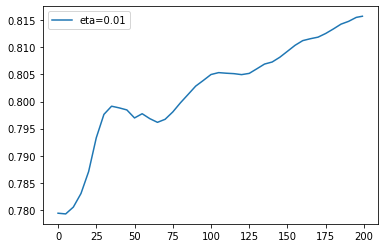

In [253]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = key)
plt.legend()

In [255]:
# contoh lain
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']
for eta in etas:
    df_score=scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label = eta)
plt.legend()

KeyError: 'eta=0.1'

experiment at using different max_depth

In [256]:
scores = {}

In [257]:
%%capture output 
#capture everything that this code outputs to a string

#lets see if we train use 10 trees
#train model
xgb_params = {
    'eta': 0.1, #same with learning_rate
    'max_depth': 10,
    'min_child_weight': 1, #same with min_sample_leaf
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    'nthread': 8, #for prallelize training
    'seed': 1, 
    'verbosity': 1, 

}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval = 5, #to print auc every 5 steps
                  evals=watchlist)

In [258]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [259]:
scores.keys()

dict_keys(['max_depth=10'])

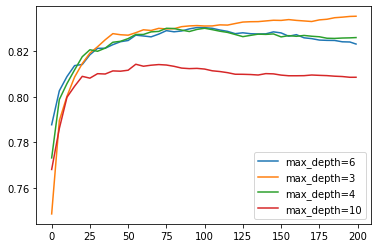

In [ ]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = max_depth)
plt.legend()

In [ ]:
del scores['max_depth=10']

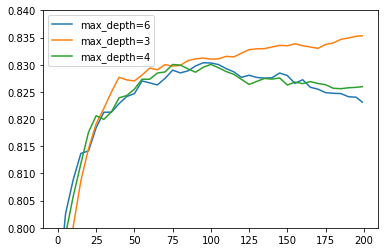

In [ ]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = max_depth)

plt.ylim(0.8, 0.84) #limit the y label
plt.legend()

experiment using different min_child_weight

So, we decide the best one for eta is 0.1 and max_depth is 3

In [ ]:
scores={}

In [ ]:
%%capture output 
#capture everything that this code outputs to a string

#lets see if we train use 10 trees
#train model
xgb_params = {
    'eta': 0.1, #same with learning_rate
    'max_depth': 3,
    'min_child_weight': 30, #same with min_sample_leaf
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    'nthread': 8, #for prallelize training
    'seed': 1, 
    'verbosity': 1, 

}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval = 5, #to print auc every 5 steps
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [ ]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

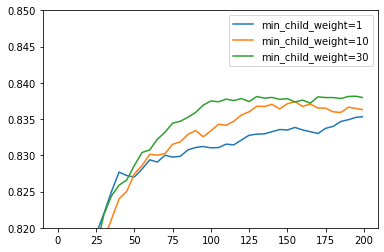

In [ ]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = min_child_weight)

plt.ylim(0.82, 0.85) #limit the y label
plt.legend()

so, let's go with min_child_weight = 1

In [ ]:
xgb_params = {
    'eta': 0.1, #same with learning_rate
    'max_depth': 3,
    'min_child_weight': 30, #same with min_sample_leaf
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    'nthread': 8, #for prallelize training
    'seed': 1, 
    'verbosity': 1, 

}

model = xgb.train(xgb_params, dtrain, num_boost_round=175,)

## Selecting The FInal model

In [ ]:
# decision tree
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [ ]:
#evaluation on decision tree
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.783338028169014

In [ ]:
# random forest

rf = RandomForestClassifier(n_estimators=200,
                            max_depth= 10,
                            min_samples_leaf= 3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [ ]:
#evaluation on random forest
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8276197183098591

In [ ]:
#xgboost
xgb_params = {
    'eta': 0.1, #same with learning_rate
    'max_depth': 3,
    'min_child_weight': 30, #same with min_sample_leaf
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    'nthread': 8, #for prallelize training
    'seed': 1, 
    'verbosity': 1, 

}

model = xgb.train(xgb_params, dtrain, num_boost_round=175,)

In [ ]:
#evaluation on xgboost
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8379671361502349

train model with full training data and test data

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train.status == 'default').astype(int).values
del df_full_train['status']

In [ ]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

#test data
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [ ]:
#Dmatrik

dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                         feature_names= list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names= list(dv.get_feature_names_out()))

In [ ]:

xgb_params = {
    'eta': 0.1, #same with learning_rate
    'max_depth': 3,
    'min_child_weight': 30, #same with min_sample_leaf
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    'nthread': 8, #for prallelize training
    'seed': 1, 
    'verbosity': 1, 

}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [ ]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8311543912809736